In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df = pd.read_csv('original/ArchiveII_with_motiv.csv')
df['fam'] = df['id'].str.split('_').str[0]

print(df.head())

                                                  id  \
0                        5s_Acholeplasma-laidlawii-1   
1                          5s_Acidovorax-temperans-1   
2                   tmRNA_Stre.gord._TRW-29390_1-349   
3  tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...   
4                              srp_List.mono._U15684   

                                            sequence  \
0  UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...   
1  UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...   
2  GGGGUCGUUACGGAUUCGACAGGCAUUAUGAGGCAUAUUUUGCGAC...   
3  UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...   
4  UGGGUUGAUGAGCGUGAAGCCUUCGCUCGGUUGGAUUUUUCUUCAU...   

                                           structure  \
0  ((((((((......((((((((....((((((.............)...   
1  .(((((((((.....((((((((.....((((((...............   
2  (((((((............((((((((....(((((((((..((((...   
3  (((((((..((((........))))((((((.......)))))).....   
4  .(.((((...(.(.((.(.((..(.....)..)).)...(...

In [78]:


# Contar todas las apariciones de cada etiqueta
all_motivos = ''.join(df['motivos'].tolist())
counts = Counter(all_motivos)

# Crear DataFrame de conteos
counts_df = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
counts_df.index.name = 'motivo'
counts_df = counts_df.reset_index().sort_values('motivo')

display(counts_df)


,motivo,count
4,B,21533
5,E,21602
3,H,99356
2,I,104973
1,M,103467
0,S,393384
6,X,4976


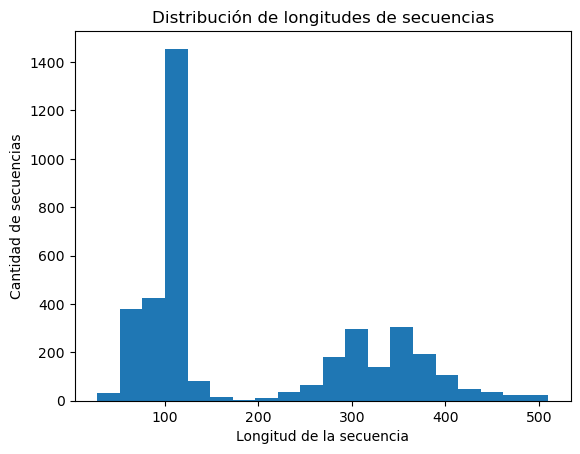

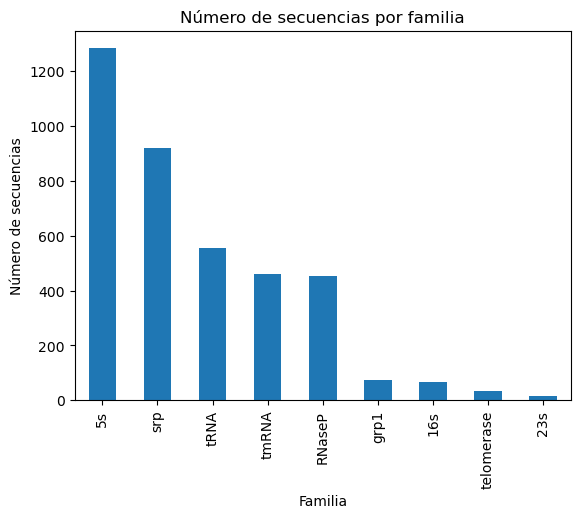

,S,M,I,B,H,X,E
fam,,,,,,,
16s,0.520223,0.137462,0.163367,0.023805,0.112918,0.038861,0.086702
23s,0.558331,0.114430,0.150038,0.023868,0.145459,0.023689,0.006307
5s,0.565979,0.067743,0.182924,0.028991,0.139273,NaN,0.018680
RNaseP,0.528300,0.176976,0.088092,0.051397,0.131234,0.063211,0.022594
grp1,0.495522,0.082127,0.112559,0.026399,0.166417,0.060739,0.082734
srp,0.577054,0.037669,0.232322,0.036511,0.059904,0.031486,0.088009
tRNA,0.534495,0.116710,0.035283,0.011494,0.291973,NaN,0.052830
telomerase,0.426318,0.067090,0.333388,0.011099,0.096552,0.039566,0.044074
tmRNA,0.417070,0.300999,0.100608,0.023961,0.150523,NaN,0.010701


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter 

# Cargar datos
df = pd.read_csv('original/ArchiveII_with_motiv.csv')
df['fam'] = df['id'].str.split('_').str[0]

# Histograma de longitudes de secuencia
plt.figure()
plt.hist(df['len'], bins=20)
plt.xlabel('Longitud de la secuencia')
plt.ylabel('Cantidad de secuencias')
plt.title('Distribución de longitudes de secuencias')
plt.show()

# Conteo de secuencias por familia
plt.figure()
df['fam'].value_counts().plot(kind='bar')
plt.xlabel('Familia')
plt.ylabel('Número de secuencias')
plt.title('Número de secuencias por familia')
plt.show()

# Conteo de etiquetas estructurales
label_types = ['S','M','I','B','H','X','E']
# Para cada etiqueta, contar ocurrencias
label_counts_df = pd.DataFrame(
    df['motivos'].apply(lambda s: Counter(s)).tolist(),
    index=df.index
)[label_types]

# Fracción de cada etiqueta en la secuencia
label_frac_df = label_counts_df.div(df['len'], axis=0)
# Agregar columna de familia y calcular promedio por familia
avg_frac = label_frac_df.join(df['fam']).groupby('fam').mean()

avg_frac

,S,M,I,B,H,X,E
0,60.0,10.0,22.0,3.0,16.0,NaN,1.0
1,66.0,9.0,19.0,3.0,17.0,NaN,1.0
2,156.0,115.0,23.0,3.0,48.0,NaN,4.0
3,44.0,5.0,NaN,NaN,22.0,NaN,4.0
4,172.0,9.0,63.0,9.0,22.0,NaN,4.0
...,...,...,...,...,...,...,...
3859,62.0,9.0,21.0,3.0,16.0,NaN,3.0
3860,20.0,NaN,29.0,NaN,4.0,NaN,35.0
3861,162.0,124.0,40.0,4.0,52.0,NaN,1.0
3862,68.0,6.0,25.0,3.0,16.0,NaN,2.0


,S,M,I,B,H,X,E
0,0.535714,0.089286,0.196429,0.026786,0.142857,NaN,0.008929
1,0.573913,0.078261,0.165217,0.026087,0.147826,NaN,0.008696
2,0.446991,0.329513,0.065903,0.008596,0.137536,NaN,0.011461
3,0.586667,0.066667,NaN,NaN,0.293333,NaN,0.053333
4,0.616487,0.032258,0.225806,0.032258,0.078853,NaN,0.014337
...,...,...,...,...,...,...,...
3859,0.543860,0.078947,0.184211,0.026316,0.140351,NaN,0.026316
3860,0.227273,NaN,0.329545,NaN,0.045455,NaN,0.397727
3861,0.422977,0.323760,0.104439,0.010444,0.135770,NaN,0.002611
3862,0.566667,0.050000,0.208333,0.025000,0.133333,NaN,0.016667


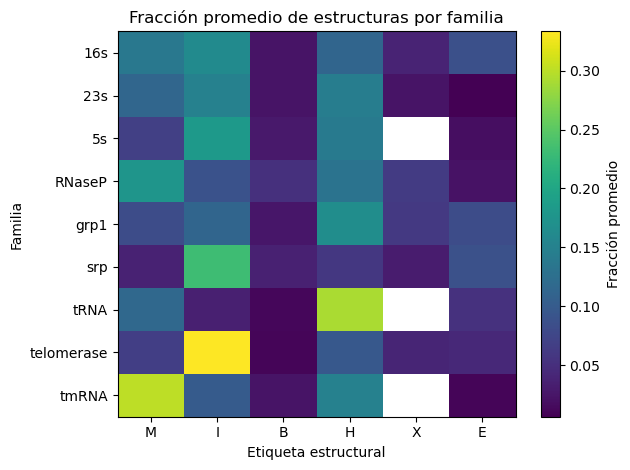

In [72]:
# Definir tipos de etiqueta
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']
label2_types = ['M', 'I', 'B', 'H', 'X', 'E']

# Contar etiquetas por secuencia
label_counts = df['motivos'].apply(lambda s: Counter(s))
label_counts_df = pd.DataFrame(label_counts.tolist(), index=df.index)[label_types]
display(label_counts_df)
# Calcular fracción de cada etiqueta por secuencia
label_frac_df = label_counts_df.div(df['len'], axis=0)
display(label_frac_df)
label_frac_df.drop(columns=['S'], inplace=True)
# Promedio de fracciones por familia
avg_frac = label_frac_df.join(df['fam']).groupby('fam').mean()

# Dibujar heatmap
plt.figure()
plt.imshow(avg_frac.values, aspect='auto')
plt.xticks(range(len(label2_types)), label2_types)
plt.yticks(range(len(avg_frac.index)), avg_frac.index)
plt.xlabel('Etiqueta estructural')
plt.ylabel('Familia')
plt.title('Fracción promedio de estructuras por familia')
plt.colorbar(label='Fracción promedio')
plt.tight_layout()
plt.show()

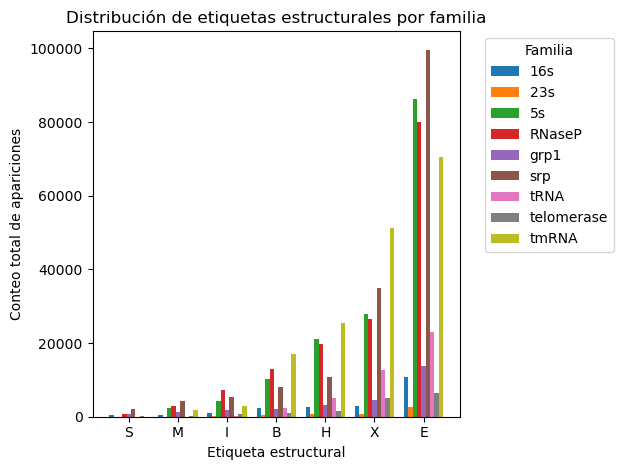

In [73]:

# Definir tipos de etiqueta
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']

# Contar etiquetas por secuencia
label_counts = df['motivos'].apply(lambda s: Counter(s))
label_counts_df = pd.DataFrame(label_counts.tolist(), index=df.index)[label_types]

# Sumar conteo total por familia
total_counts = label_counts_df.join(df['fam']).groupby('fam').sum()

# Dibujar gráfico de barras agrupadas
motivos = label_types
families = total_counts.index.tolist()
x = range(len(motivos))
width = 0.8 / len(families)

plt.figure()
for i, fam in enumerate(families):
    plt.bar([pos + i*width for pos in x], total_counts.loc[fam].sort_values(), width=width, label=fam)

# Ajustar ejes
plt.xticks([pos + width*(len(families)-1)/2 for pos in x], motivos)
plt.xlabel('Etiqueta estructural')
plt.ylabel('Conteo total de apariciones')
plt.title('Distribución de etiquetas estructurales por familia')
plt.legend(title='Familia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:

label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)[label_types]

/tmp/ipykernel_451480/3487538291.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/3487538291.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/3487538291.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/3487538291.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/3487538291.py:38: UserWarning: set_ticklabels() should only be used with a

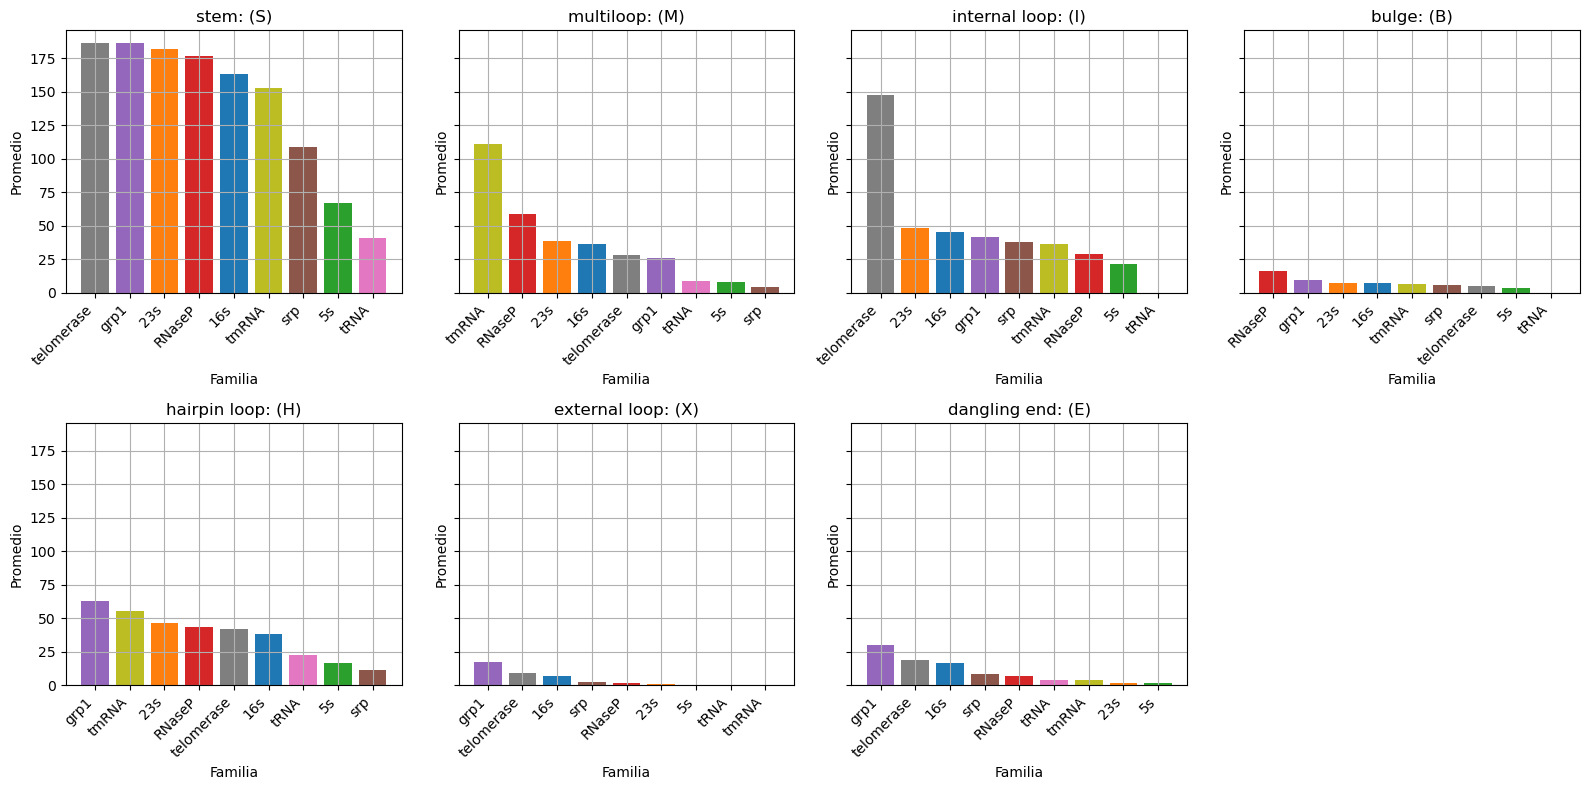

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Definir tipos de etiqueta
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']

label_map = {'S': 'stem',
    'M': 'multiloop',
    'I': 'internal loop',
    'B': 'bulge',
    'H': 'hairpin loop',
    'X': 'external loop',
    'E': 'dangling end'}
families = sorted(df['fam'].unique())
cmap = plt.get_cmap('tab10')
color_map = {fam: cmap(i % cmap.N) for i, fam in enumerate(families)}

# Contar etiquetas por secuencia y crear DataFrame
label_counts = df['motivos'].apply(lambda s: Counter(s))
label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)[label_types]

# Calcular promedio de cuentas de cada etiqueta por familia
avg_counts = label_counts_df.join(df['fam']).groupby('fam').mean()

# Crear figura con subplots
n_labels = len(label_types)
cols = 4
rows = (n_labels + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 8), sharey=True)

# Plot en cada subplot
for idx, label in enumerate(label_types):
    ax = axes[idx // cols, idx % cols]
    data = avg_counts[label].sort_values(ascending=False)
    ax.bar(data.index, data.values, color=[color_map[fam] for fam in data.index])
    ax.set_title(f'{label_map[label]}: ({label})')
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_xlabel('Familia')
    ax.set_ylabel('Promedio')
    ax.grid(True)
    
    
# Desactivar subplots vacíos
for idx in range(n_labels, rows * cols):
    fig.delaxes(axes[idx // cols, idx % cols])

plt.tight_layout()
plt.show()


/tmp/ipykernel_451480/2175677386.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/2175677386.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/2175677386.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/2175677386.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
/tmp/ipykernel_451480/2175677386.py:36: UserWarning: set_ticklabels() should only be used with a

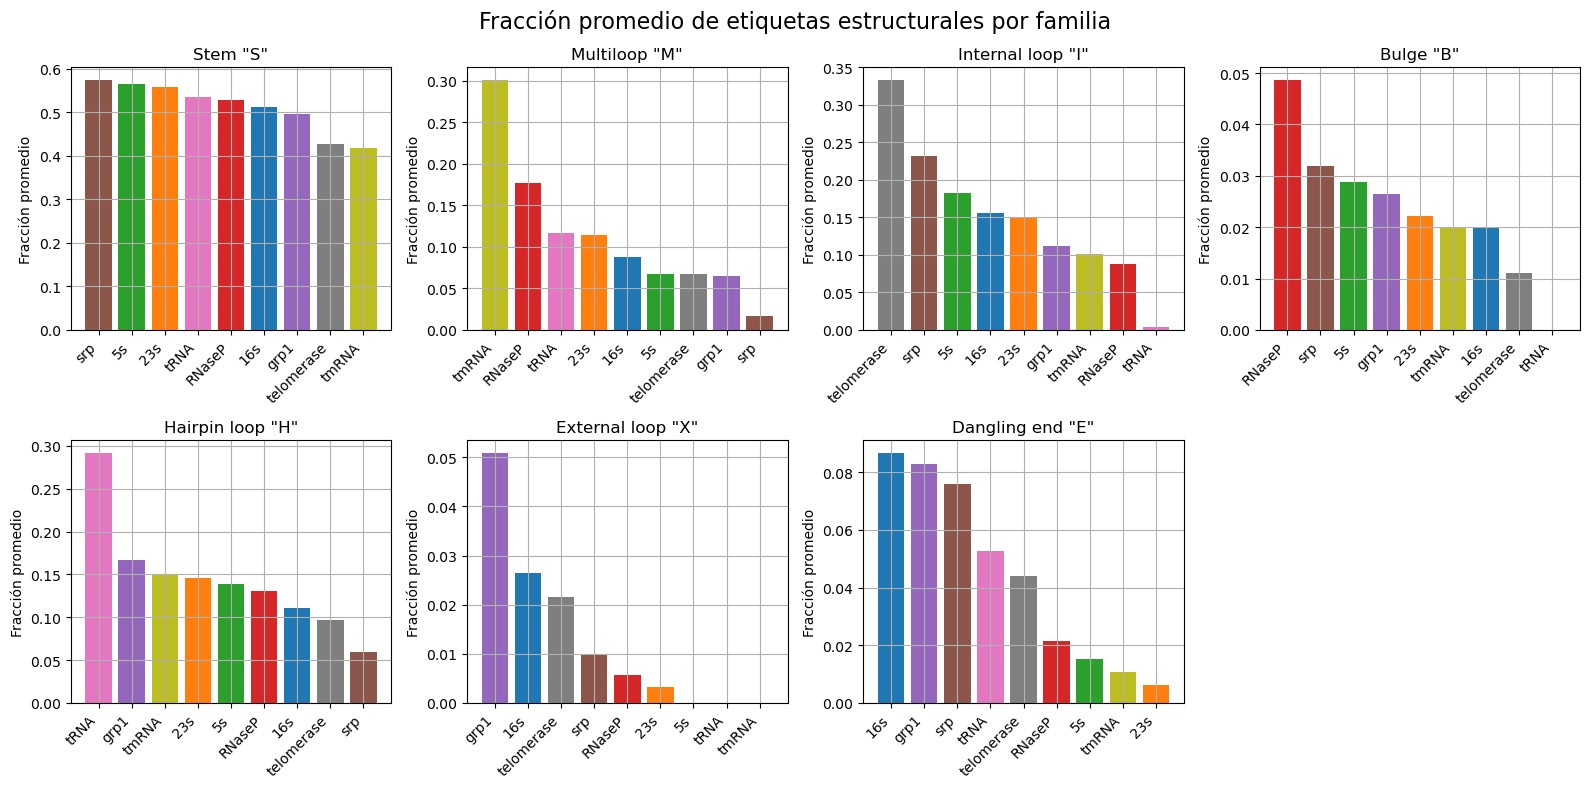

In [83]:

# Definir tipos de etiqueta
label_types = ['S', 'M', 'I', 'B', 'H', 'X', 'E']
label_map = {'S': 'Stem',
    'M': 'Multiloop',
    'I': 'Internal loop',
    'B': 'Bulge',
    'H': 'Hairpin loop',
    'X': 'External loop',
    'E': 'Dangling end'}

families = sorted(df['fam'].unique())
cmap = plt.get_cmap('tab10')
color_map = {fam: cmap(i % cmap.N) for i, fam in enumerate(families)}

# Contar etiquetas por secuencia y crear DataFrame
label_counts = df['motivos'].apply(lambda s: Counter(s))
label_counts_df = pd.DataFrame(label_counts.tolist()).fillna(0)[label_types]

# Dividir cada cuenta por la longitud de su secuencia para obtener fracción
label_frac_df = label_counts_df.div(df['len'], axis=0)

# Calcular promedio de fracción por familia
avg_frac = label_frac_df.join(df['fam']).groupby('fam').mean()

# Crear figura con subplots
n_motivos = len(label_types)
cols = 4
rows = (n_labels + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 8))

for idx, label in enumerate(label_types):
    ax = axes[idx // cols, idx % cols]
    data = avg_frac[label].sort_values(ascending=False)
    ax.bar(data.index, data.values, color=[color_map[f] for f in data.index])
    ax.set_title(f'{label_map[label]} "{label}"')
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    ax.set_ylabel('Fracción promedio')
    ax.grid()
    # ax.set_ylim(0, data.max() * 1.1)

# Desactivar subplots vacíos
for idx in range(n_motivos, rows * cols):
    fig.delaxes(axes[idx // cols, idx % cols])
fig.suptitle('Fracción promedio de etiquetas estructurales por familia', fontsize=16)
plt.tight_layout()
plt.show()
